In [3]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [4]:
df = pd.read_csv("./data.csv", delimiter=";")
df.head()


,Amount,MS
0,10,30
1,25,31
2,50,49
3,75,60
4,100,62


In [5]:
df = df.groupby(["Amount"]).mean().reset_index()
df


,Amount,MS
0,10,21.90
1,25,28.25
2,50,44.25
3,75,65.40
4,100,88.55
5,250,166.80
6,500,294.65
7,750,423.50
8,1000,548.60
9,2500,1356.60


9i + 1

$\sum_{i=1}^{n-1} 9i+1 \\
= (first + 1 + last + 1) \cdot \frac{n - 1}{2} \\
= (9 * 1 + 1 + 9(n - 1) + 1) \cdot \frac{n - 1}{2}  \\
= (9(n - 1) + 11) \cdot \frac{n - 1}{2}  \\
= (9n + 2) \cdot \frac{n - 1}{2} \\
= (4.5n + 1) \cdot (n - 1) \\
= 4.5n(n - 1) + 1(n - 1) \\
= 4.5n^2 - 4.5n + n - 1 \\
= 4.5n^2 - 3.5n - 1
$



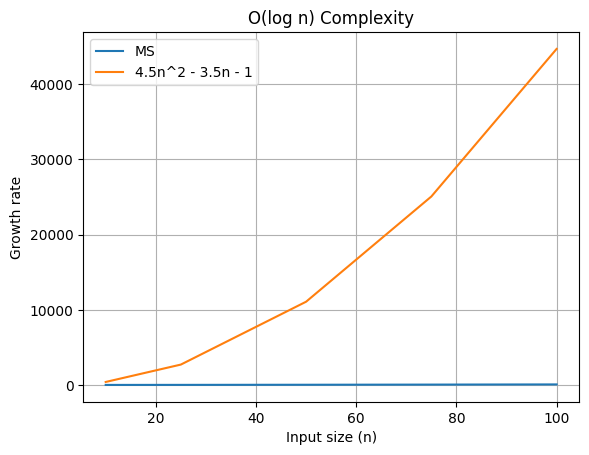

In [6]:
df[:5].plot.line("Amount", "MS")

plt.plot(df["Amount"].unique()[:5], [4.5*pow(x, 2) - 3.5 * x - 1 for x in df["Amount"].unique()][:5], label="4.5n^2 - 3.5n - 1")

plt.xlabel("Input size (n)")
plt.ylabel("Growth rate")
plt.title("O(log n) Complexity")
plt.legend()
plt.grid(True)
plt.show()

15 15


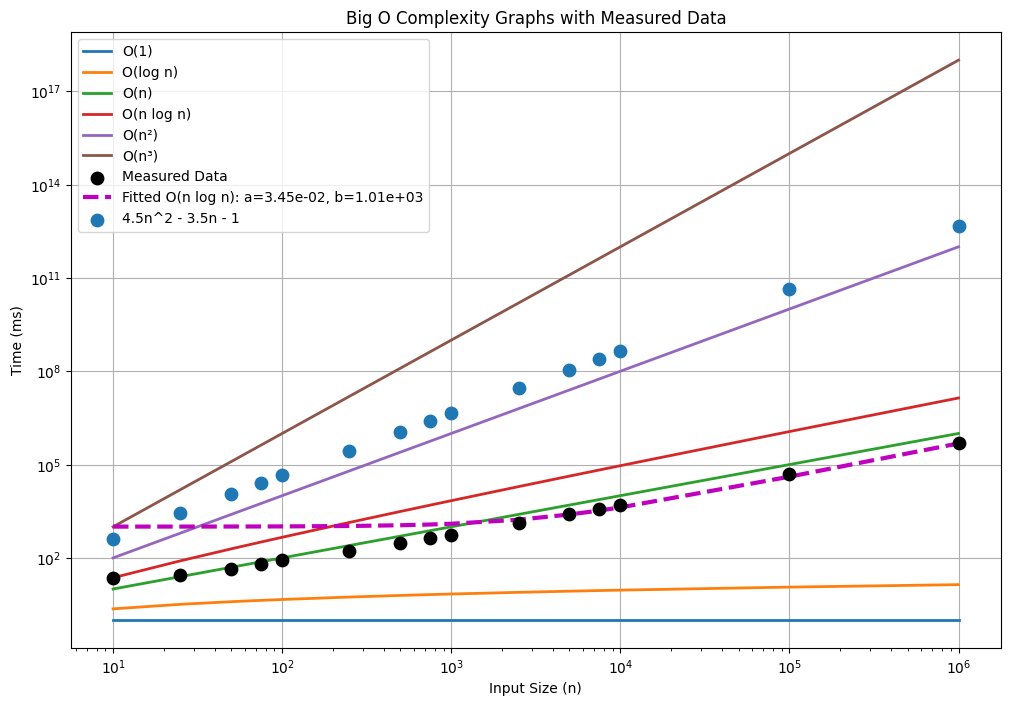

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Given input sizes and measured times (replace with your actual data)
n = df["Amount"]
measured_time = df["MS"]

print(len(n), len(measured_time))

# Define a function for O(n log n) model: f(n) = a * n * log(n) + b
def model_nlogn(n, a, b):
    return a * n * np.log(n) + b

# Fit the measured data to the model_nlogn function
params, _ = curve_fit(model_nlogn, n, measured_time)
fitted_nlogn = model_nlogn(n, *params)

# Compute theoretical curves for comparison
const = np.ones_like(n)                 # O(1)
logn = np.log(n)                        # O(log n)
linear = n                            # O(n)
nlogn = n * np.log(n)                   # O(n log n)
quadratic = n**2                       # O(n²)
cubic = n**3                           # O(n³)

plt.figure(figsize=(12, 8))

# Plot the theoretical curves (optional; use markers for clarity)
plt.plot(n, const, label="O(1)", linestyle='-', linewidth=2)
plt.plot(n, logn, label="O(log n)", linestyle='-', linewidth=2)
plt.plot(n, linear, label="O(n)", linestyle='-', linewidth=2)
plt.plot(n, nlogn, label="O(n log n)", linestyle='-', linewidth=2)
plt.plot(n, quadratic, label="O(n²)", linestyle='-', linewidth=2)
plt.plot(n, cubic, label="O(n³)", linestyle='-', linewidth=2)

# Overlay the measured data as scatter points
plt.scatter(n, measured_time, color='black', s=80, label="Measured Data", zorder=5)

# Plot the fitted O(n log n) curve
plt.plot(n, fitted_nlogn, 'm--', linewidth=3,
         label=f"Fitted O(n log n): a={params[0]:.2e}, b={params[1]:.2e}")


plt.scatter(n, [4.5*pow(x, 2) - 3.5 * x - 1 for x in n], s=80, label="4.5n^2 - 3.5n - 1", zorder=5)

plt.xlabel("Input Size (n)")
plt.ylabel("Time (ms)")
plt.title("Big O Complexity Graphs with Measured Data")
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="major", ls="-")
plt.show()
